In [51]:
import math
import matplotlib.pyplot as plt
import numpy as np
gamma = 1
n=[640,1280,5120,10240,20480,40980,81920,163840,327680,655360,1310720,2621440]

In [52]:
def createG(N,k,a):
    g_array= [0]*N
    for index in range(0,len(g_array)):
        if index%k >= (k-a):
            g_array[index]=1
    return g_array

In [54]:
def createHatG(N,k,alpha):
    hatg_array= [0]*N
    for index in range(0,len(hatg_array)):
        if index%k < alpha:
            hatg_array[index]=1
    for index in range(0,len(hatg_array)):
        if index%k == (k-1):
            hatg_array[index]=1
    return hatg_array

In [55]:
def calculateCost(hatg_array,g_array):
    i = 0
    algoCost = 0
    index = 1
    badCost = 0
    count_bad = 0
    for job in g_array:
        if job == 1 and hatg_array[i] == 0:
            algoCost = algoCost+pow(index,gamma)
            index = index+1
            
        elif job == 1 and hatg_array[i] == 1:
            algoCost = algoCost+pow(index,gamma)
            index=1
            
        elif job == 0 and hatg_array[i] == 1:
            badCost=badCost+pow(index,gamma)
            index = 1
            
        else:
            badCost=badCost+pow(index,gamma)
            index=index+1        
        i = i+1
        
    algoCost = algoCost+len(g_array)
    
    return algoCost, badCost

In [56]:
def makePlot(A_1,B_1,A_2,B_2,A_3,B_3,A_4,B_4,A_5,B_5,A_6,B_6):

    
    plt.loglog(B_1,A_1,'red',marker='.')
    plt.loglog(B_2,A_2,'teal',marker='o')
    plt.loglog(B_3,A_3,'orange',marker='s')
    plt.loglog(B_4,A_4,'black',marker='*')
    plt.loglog(B_5,A_5,'green',marker='v')
    plt.loglog(B_6,A_6,'yellow',marker='v')

    plt.axline([1000, 1000], [1000000, 1000000],linestyle ='--')
    #plt.xlim([10000, 1000000000000])
    #plt.ylim([1000, 10000000])

    plt.legend(['alpha=1','alpha=8','alpha=16','alpha=32','alpha=64'])
    plt.xlabel('Total Bad cost')
    plt.ylabel('Total Algorithm cost')
    plt.title('Simulation for gamma = 1')
    plt.show()

In [57]:
def LCharge_Simulate():
    alpha=[1,2,4,8,16,32] 
    A_1=[0]*(len(n))
    B_1=[0]*(len(n))
    A_2=[0]*(len(n))
    B_2=[0]*(len(n))
    A_3=[0]*(len(n))
    B_3=[0]*(len(n))
    A_4=[0]*(len(n))
    B_4=[0]*(len(n))
    A_5=[0]*(len(n))
    B_5=[0]*(len(n))
    A_6=[0]*(len(n))
    B_6=[0]*(len(n))
    for a in alpha:
        print('For alpha = ',a)
        i=0
        for N in n:
            result=[]
            hatg_array = createHatG(N,N/10,a)
            g_array = createG(N,N/10,a)
            print('Experiment with',N/10, 'partition')
            print('Experiment with',N/10, 'jobs')
            result = calculateCost(hatg_array,g_array)
            if a==alpha[0]:
                A_1[i] = result[0]
                B_1[i] = result[1]
            if a==alpha[1]:
                A_2[i] = result[0]
                B_2[i] = result[1]
            if a==alpha[2]:
                A_3[i] = result[0]
                B_3[i] = result[1]
            if a==alpha[3]:
                A_4[i] = result[0]
                B_4[i] = result[1]
            if a==alpha[4]:
                A_5[i] = result[0]
                B_5[i] = result[1]
            if a==alpha[5]:
                A_6[i] = result[0]
                B_6[i] = result[1]
            i=i+1
    print('A_1:',A_1)
    print('B_1:',B_1)
    print('A_2:',A_2)
    print('B_2:',B_2)
    print('A_3:',A_3)
    print('B_3:',B_3)
    print('A_4:',A_4)
    print('B_4:',B_4)
    print('A_5:',A_5)
    print('B_5:',B_5)
    print('A_6:',A_6)
    print('B_6:',B_6)
    makePlot(A_1,B_1,A_2,B_2,A_3,B_3,A_4,B_4,A_5,B_5,A_6,B_6)

For alpha =  1
Experiment with 64.0 partition
Experiment with 64.0 jobs
Experiment with 128.0 partition
Experiment with 128.0 jobs
Experiment with 512.0 partition
Experiment with 512.0 jobs
Experiment with 1024.0 partition
Experiment with 1024.0 jobs
Experiment with 2048.0 partition
Experiment with 2048.0 jobs
Experiment with 4098.0 partition
Experiment with 4098.0 jobs
Experiment with 8192.0 partition
Experiment with 8192.0 jobs
Experiment with 16384.0 partition
Experiment with 16384.0 jobs
Experiment with 32768.0 partition
Experiment with 32768.0 jobs
Experiment with 65536.0 partition
Experiment with 65536.0 jobs
Experiment with 131072.0 partition
Experiment with 131072.0 jobs
Experiment with 262144.0 partition
Experiment with 262144.0 jobs
For alpha =  2
Experiment with 64.0 partition
Experiment with 64.0 jobs
Experiment with 128.0 partition
Experiment with 128.0 jobs
Experiment with 512.0 partition
Experiment with 512.0 jobs
Experiment with 1024.0 partition
Experiment with 1024.0 j

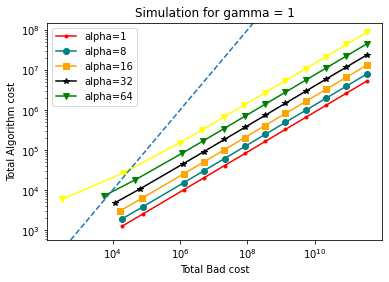

In [58]:
LCharge_Simulate()